Student name: Maureen Anduuru

Student pace: FULL TIME

Scheduled project review date/time:

Instructor name:Nikita Njoroge Lucille Kaleha Samuel karu

Blog post URL:https://github.com/MaureenAnduuru/phase_3_-project.git


# Tanzania Water wells - Project
![Water Wells](https://www.multivu.com/players/English/8627951-vasayo-hearts-and-hands-for-humanity/image/Childsmiling_1571867696505-HR.jpg)



## 1. Load & Clean Data 
The steps below are to achieve this step. 
The dataset selected for the project is the Tanazania Water Wells dataset.

## Tanzanian Water Wells - Project

### Problem Statement
Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

 


### The Solution from analysis of the data.
Build a classifier to predict the condition of a water well, using information about the sort of pump, when it was installed, etc.

### The Target audience for the solution.
The audience could be an NGO focused on locating wells needing repair, or the Government of Tanzania looking to find patterns in non-functional wells to influence how new wells are built. Note that this is a ternary classification problem by default, but can be engineered to be binary.

### The dataset is already split into:
1. Training set values.csv - For training of the models
2. Test set values.csv - For model evaluation and Visualisation

In [19]:
# Loading the libraries

# data handling
import numpy as np
import pandas as pd
import os
import pickle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import warnings

# modeling
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier


# statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error



# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

In [20]:
#Loading of the Trainng set values csv file into a pandas dataframe object
wells_df = pd.read_csv('Training set values.csv')

# Display the first five observations of the full DataFrame
print(wells_df.head())


      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quant

In [21]:
#Create a copy of the original dataset for manipultation
data = wells_df.copy()

This function returns a comprehensive description for our dataframe object/data.

In [22]:
def explore_data(df):
    '''
    Print some basic statistics and information about the DataFrame
    '''
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("--------------------------------\n")
    print("Data types:\n", df.dtypes)
    print("--------------------------------\n")
    print("info:\n", df.info())
    print("--------------------------------\n")
    print(f"columns: {df.columns}\n")
    print("--------------------------------\n")
    print("Head:\n", df.head())
    print("Tail:\n", df.tail())
    print("statistical summary:\n", df.describe())
    print("------------------------------------------\n")
    
    

In [23]:
explore_data(data)

Number of rows: 59400
Number of columns: 40
--------------------------------

Data types:
 id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management        

### Column Names and Descriptions for the DataSet
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

# Data preparation


## Data Cleaning

In [24]:
def clean_data(df):
    
    print("Missing values:\n", df.isnull().sum())
    print("------------------------------------------\n")
    print("duplicated values:\n", df.duplicated)
    print("------------------------------------------\n")
    print("duplicated values:\n", df.duplicated().sum())
    
clean_data(data)
    

Missing values:
 id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality         

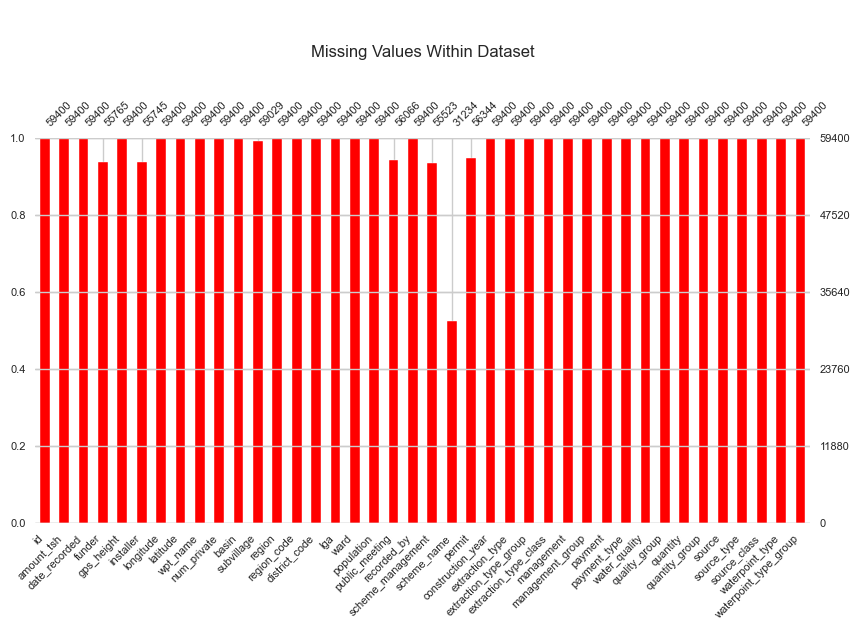

In [25]:
# Visualise the missing values in the dataset
msno.bar(data, color='red', figsize=(10, 5), fontsize=8)
plt.title("""

Missing Values Within Dataset

""");

In [26]:
# percentage of missing data
wells_df.isnull().sum()/len(wells_df)*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

From the above dataset investigation it can be seen that, the following colums(features)have missing values
1. funder - 3635 missing Values
2. installer - 3655 missing values
3. subvillage - 371 missing values
4. public_meeting - 3334 missing values
5. scheme_management - 3877 missing values
6. scheme_name - 28166 missing values
7. permit - 3056 missing values 


In [27]:
# Columns to drop
columns_to_drop = ['scheme_name', 'subvillage', 'wpt_name', 'num_private', 'recorded_by']

# Drop the columns
data.drop(columns_to_drop, axis=1, inplace=True)


# Set up a new dataset
new_data = data.copy()

In [28]:
explore_data(new_data)

Number of rows: 59400
Number of columns: 35
--------------------------------

Data types:
 id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group     

#### In order to build a model that can predict the distribution of labels, the relevance and importance of each feature has to be taken into consideration. Here is some of the reasoning behind droping of certain features. 
* `wpt_name`: This column represents the name of the waterpoint. Since the column name descriptions don't indicate that this information is crucial for predicting the waterpoint functionality, it can be dropped.

* `num_private`: The column name description doesn't provide any information about this feature, and it may not have a significant impact on predicting waterpoint functionality. Hence, it can be dropped.

* `recorded_by`: This column represents the group entering the row of data. If all the values in this column are the same, it doesn't provide any useful information for prediction. You can check its unique values to verify this. If it has only one unique value, it can be dropped.

* `scheme_name`: Since it has a high number of missing values (28166), it may not provide significant predictive power and can be dropped.

* `subvillage`: Although it has a relatively small number of missing values (371), it might not be crucial for predicting the waterpoint functionality. Unless you have domain knowledge suggesting its importance, it can be dropped.

#### Some fetaures have been kept regardless of whether or not they contain missing values because they may have an impact in the overall functionality of the water well
* `installer`: With 3655 missing values, this feature may not strongly correlate with the functionality of waterpoints. However, it will be of importance to establish which installer's wells were found to have most faults. This may not neccessarily be used in the model training but it offers us valuable insight as to the track record of the installter. 

* `funder`: Similar to 'installer', if it has a large number of missing values (3635) and does not seem to be highly informative for predicting functionality, however for analysis it is important to establish which funder had the best working wells.

* `public_meeting` and `permit`: Although they have missing values, these features relate to public involvement and legal permissions, respectively, which could potentially impact the functionality of waterpoints. The missing values was handled by imputing the most common value.

* `scheme_management`: Although it has a high number of missing values (3877), it might still contain valuable information regarding the management of water schemes, which can affect functionality. The missing values was handled by .

## 2. Exploratory Data Analysis 

#### We carry out a visual insection of the entire dataset to establish redundant features and to drop them for optimal model training

In [29]:
# Display the first five observations of the full DataFrame
print(new_data.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude                    basin   region  ...  payment_type  \
0  34.938093  -9.856322               Lake Nyasa   Iringa  ...      annually   
1  34.698766  -2.147466            Lake Victoria     Mara  ...     never pay   
2  37.460664  -3.821329                  Pangani  Manyara  ...    per bucket   
3  38.486161 -11.155298  Ruvuma / Southern Coast   Mtwara  ...     never pay   
4  31.130847  -1.825359            Lake Victoria   Kagera  ...     never pay   

   water_quality quality_group      quantity  quan

#### Before the droping of these Features we first carry establish the correlation with the target variable, evaluate their individual contributions to the model's performance overall performance. We do this through visualisation among other techniques. 

## The datasets are split into three: 
1. Training set values.
2. Training set labels.
3. Test set values.

In order to start testing the correlations we first have to combine the training set values and Training set labels which are the target into one new CSV file that we can then use to establish the correlations of various features with the target lables.

In [30]:
#The training set labels that will be used as the models target values
wells_labels = pd.read_csv('Training set labels.csv')
wells_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [31]:
#Create a copy of the original dataset for manipultation 
labels_copy = wells_labels.copy()

#Check for any missing values
print(f"Missing values count:{labels_copy.isnull().sum()}")

# Drop the columns
labels_copy.drop('id', axis=1, inplace=True)
print(labels_copy.head())
print(labels_copy.tail())

Missing values count:id              0
status_group    0
dtype: int64
     status_group
0      functional
1      functional
2      functional
3  non functional
4      functional
      status_group
59395   functional
59396   functional
59397   functional
59398   functional
59399   functional


### Distribution of Labels
The labels in this dataset are simple. There are three possible values:

* `functional` - the waterpoint is operational and there are no repairs needed
* `functional needs repair` - the waterpoint is operational, but needs repairs
* `non functional` - the waterpoint is not operational

Since the three are our targets we merge the `labels_copy` and the `data` dataframe objects to start determining the correlations of various features 

In [32]:
# Function to convert labels
def convert_labels(label):
    if label == 'functional':
        return 1
    elif label == 'non functional':
        return 0
    elif label == 'functional needs repair':
        return 0.5

In [33]:
# Apply label conversion to the 'status_group' column
labels_copy['status_group'] = labels_copy['status_group'].apply(convert_labels)

In [34]:
print(labels_copy)
print(labels_copy.tail())

       status_group
0               1.0
1               1.0
2               1.0
3               0.0
4               1.0
...             ...
59395           1.0
59396           1.0
59397           1.0
59398           1.0
59399           1.0

[59400 rows x 1 columns]
       status_group
59395           1.0
59396           1.0
59397           1.0
59398           1.0
59399           1.0


### Objective 1. **Identifying features influencing the Labels.**

In [35]:
# Merge labels_copy and data dataframes
merged_df = pd.concat([new_data, labels_copy], axis=1)
merged_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1.0


In [36]:
explore_data(merged_df)

Number of rows: 59400
Number of columns: 36
--------------------------------

Data types:
 id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group     

column distribution functions (numerical variables)

### Displaying the column names in the dataframe

In [37]:
print(merged_df.columns)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


##### 2.Plotting a correlation matrix of numerical features using Seaborn heatmap

A correlation matrix can be used to identify variables that are strongly correlated with each other, and may therefore be important predictors of a target variable. This can help in feature selection for predictive modeling tasks.

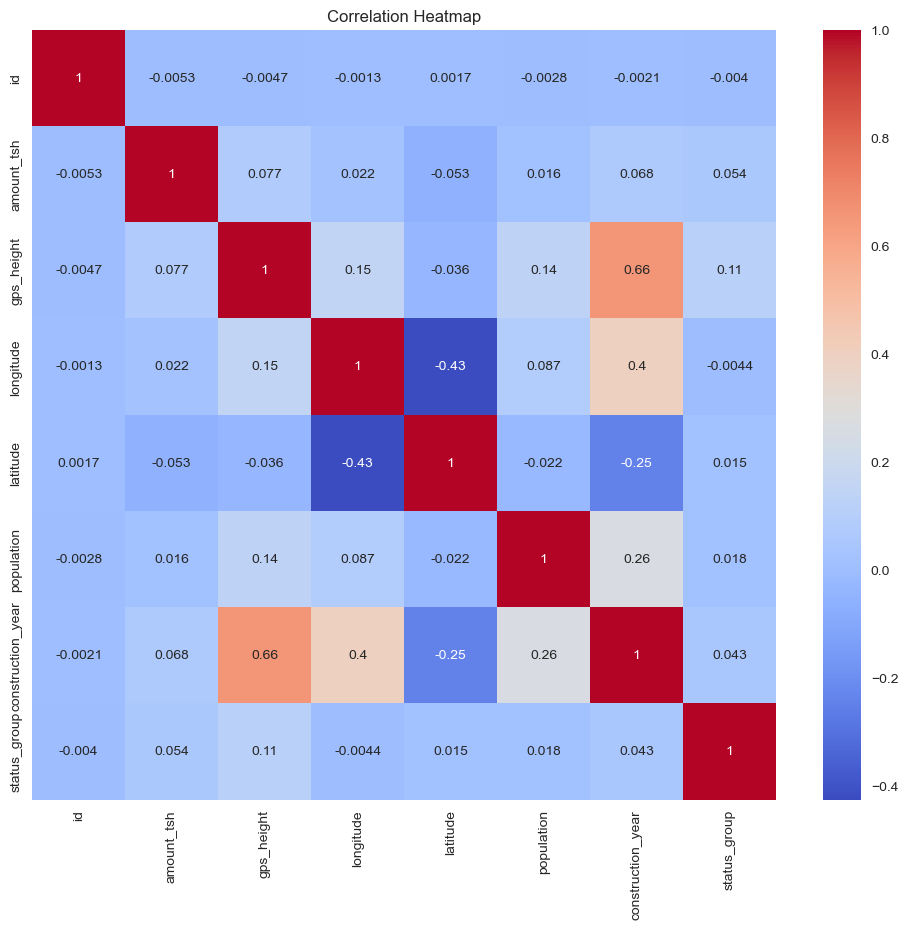

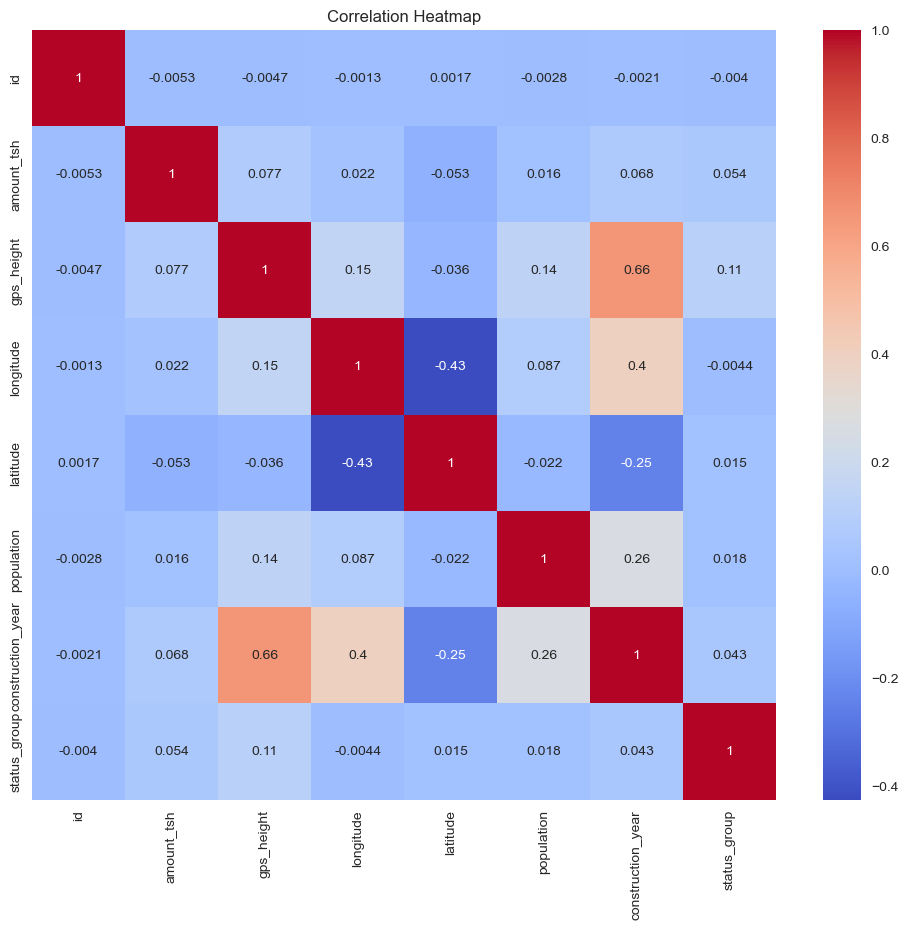

In [38]:
# Select the columns of interest (features and label)
selected_columns = ['id','amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'population', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'status_group']
# Subset the DataFrame with the selected columns
subset_df = merged_df[selected_columns]

# Map the "status_group" values to numerical values
#status_mapping = {'functional': 0, 'functional needs repair': 0.5, 'non functional': 1}
#subset_df['status_group'] = subset_df['status_group'].map(status_mapping)

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()# Map the "status_group" values to numerical values
#status_mapping = {'functional': 0, 'functional needs repair': 0.5, 'non functional': 1}
#subset_df['status_group'] = subset_df['status_group'].map(status_mapping)

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
#status group is water point condition or condition of the well.

In [40]:
# Identify top features that have the highest correlation with status_group
corr_matrix = merged_df.corr()
top_features = corr_matrix['status_group'].sort_values(ascending=False)[1:11]
print("Top features that have the highest correlation with status_group:\n", top_features)

Top features that have the highest correlation with status_group:
 gps_height           0.114029
amount_tsh           0.053702
construction_year    0.043342
population           0.017759
latitude             0.014547
id                  -0.004049
longitude           -0.004366
district_code       -0.065687
region_code         -0.108640
Name: status_group, dtype: float64


In [41]:
def plot_status_group_by_feature(data, feature):
    sns.barplot(data=data, x=feature, y='status_group')
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Waterpoint Condition')
    plt.title('Waterpoint Condition Distribution by {}'.format(feature))
    plt.show()

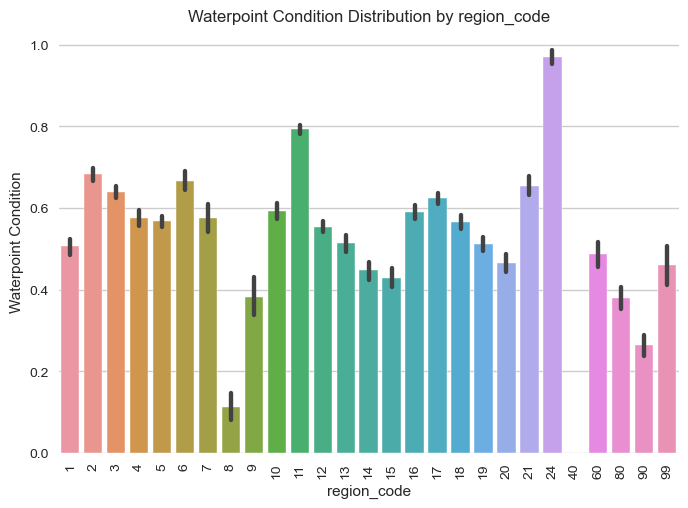

In [42]:
plot_status_group_by_feature(merged_df, 'region_code')

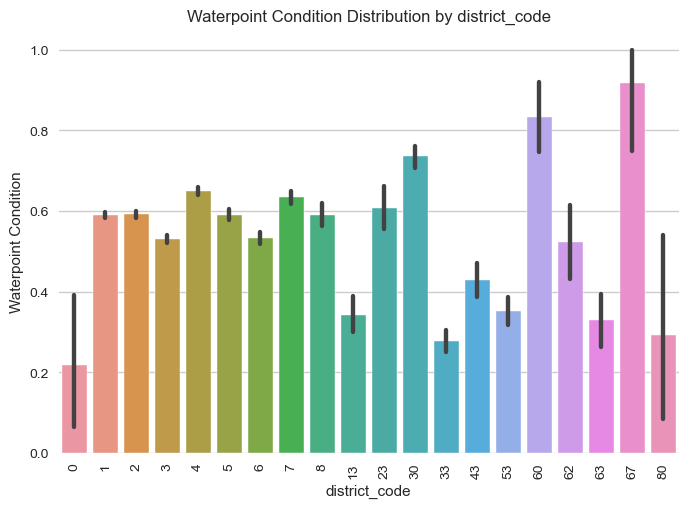

In [43]:
plot_status_group_by_feature(merged_df, 'district_code')

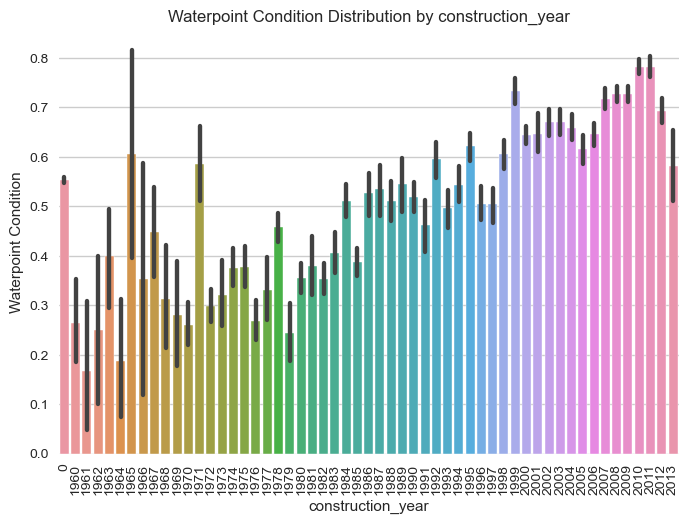

In [44]:
plot_status_group_by_feature(merged_df, 'construction_year')

In [45]:
#the graph shows that water wells constructed from 2007 to 2013 are functioning well as compared to wells in 1960

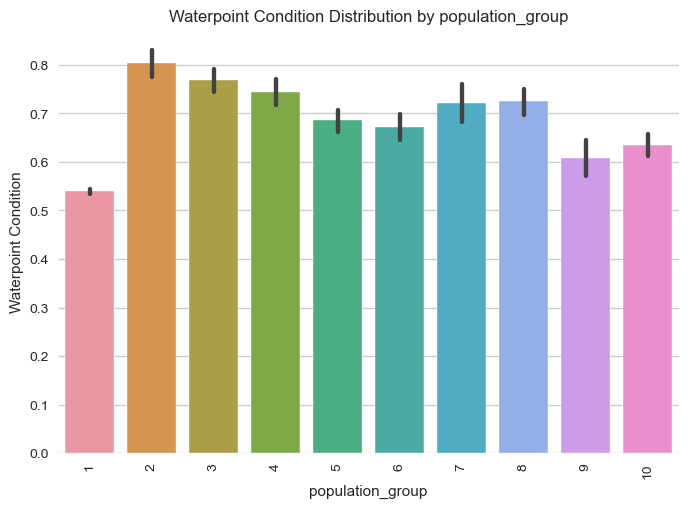

In [46]:
# Define the population groups
bins = range(0, 101, 10)
labels = range(1, 11)

# Create a new column 'population_group' in merged_df
merged_df['population_group'] = pd.cut(merged_df['population'], bins=bins, labels=labels, include_lowest=True)

plot_status_group_by_feature(merged_df, 'population_group')

In [47]:
 # the graph shows the more the population the better the well is maintained and they are
#fully functioning as compared to  places with low pooulation

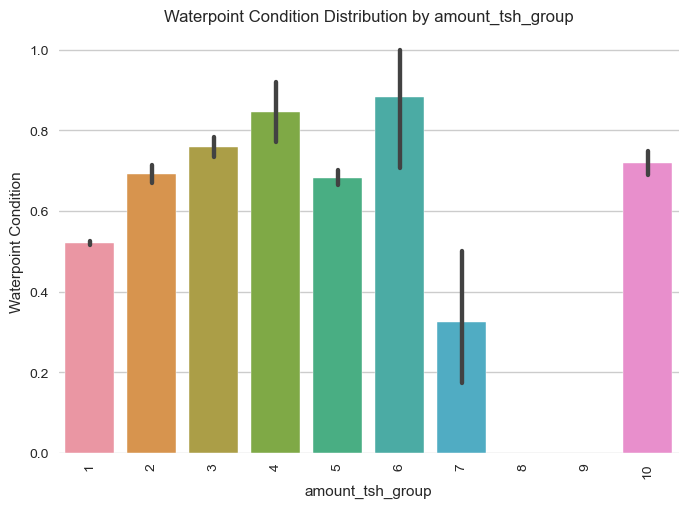

In [48]:
# Define the population groups
bins = range(0, 101, 10)
labels = range(1, 11)

# Create a new column 'population_group' in merged_df
merged_df['amount_tsh_group'] = pd.cut(merged_df['amount_tsh'], bins=bins, labels=labels, include_lowest=True)
plot_status_group_by_feature(merged_df, 'amount_tsh_group')

In [49]:
# the graph shows the amount of money spent on the well depends the how well the waterwells are taken care of and how 
#they function the more the amount the more functional thet are

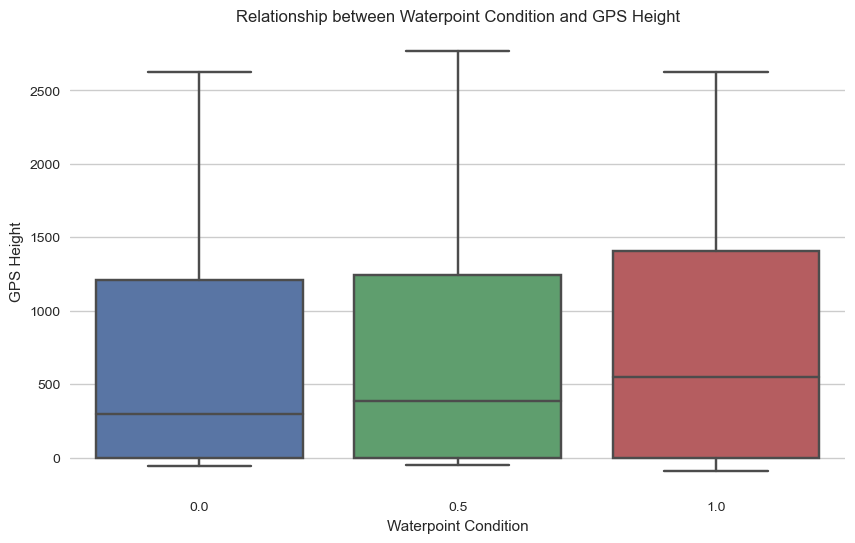

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['status_group'], y='gps_height', data=merged_df)
plt.xlabel('Waterpoint Condition')
plt.ylabel('GPS Height')
plt.title('Relationship between Waterpoint Condition and GPS Height')
plt.show()

In [51]:
# Group the data by 'Funder' and count the number of wells
funder_counts = merged_df.groupby('funder').size().reset_index(name='Number of Wells')

# Sort the funder counts in descending order
funder_counts = funder_counts.sort_values(by='Number of Wells', ascending=False)

# Reset the index and add an 'ID' column
funder_counts.reset_index(drop=True, inplace=True)

# Display the table
print(funder_counts)

                      funder  Number of Wells
0     Government Of Tanzania             9084
1                     Danida             3114
2                     Hesawa             2202
3                      Rwssp             1374
4                 World Bank             1349
...                      ...              ...
1892                  Malola                1
1893               Maliasili                1
1894                   Males                1
1895                  Makusa                1
1896     Zingibali Secondary                1

[1897 rows x 2 columns]


In [52]:
#grouping the funders has give more insight that most of the wells were constructed by 
#the Government of Tanzania and the Zingibali school is the one that has made only one water point 

In [53]:
# Get the unique funders from the funder_counts dataframe
unique_funders = funder_counts['funder'].unique()

# Filter the merged dataframe for the wells corresponding to the unique funders
filtered_df = merged_df[merged_df['funder'].isin(unique_funders)]

# Check if the wells' status_group matches the labels
matching_df = filtered_df[filtered_df['status_group'].isin(labels)]

# Display the matching wells
print(matching_df)

          id  amount_tsh date_recorded               funder  gps_height  \
0      69572      6000.0    2011-03-14                Roman        1390   
1       8776         0.0    2013-03-06              Grumeti        1399   
2      34310        25.0    2013-02-25         Lottery Club         686   
4      19728         0.0    2011-07-13          Action In A           0   
5       9944        20.0    2011-03-13  Mkinga Distric Coun           0   
...      ...         ...           ...                  ...         ...   
59393  48348         0.0    2012-10-27              Private           0   
59395  60739        10.0    2013-05-03      Germany Republi        1210   
59396  27263      4700.0    2011-05-07          Cefa-njombe        1212   
59398  31282         0.0    2011-03-08                Malec           0   
59399  26348         0.0    2011-03-23           World Bank         191   

          installer  longitude  latitude          basin       region  ...  \
0             Roman  3

### 3. Feature Engineering

### Features to be dropped:

* `date_recorded`: The date of recording may not have a direct impact on the functionality of the waterpoints and can be excluded for prediction purposes.

* `subvillage`, `region`, `region_code`, `district_code`, `lga`, `ward`: These geographic location identifiers may not directly influence the functionality of waterpoints and can be dropped.

* `quantity_group`: This feature represents the quantity of water available. In the given observations, the values in the `quantity` column are the same as the values in the `quantity_group` column. Having both features with identical information is redundant, so we can drop the `quantity_group` feature.

* `waterpoint_type`: This feature represents the kind of waterpoint. It provides specific information about the type of waterpoint, such as whether it is a standpipe, hand pump, or other types. In the given observations, the values in the `waterpoint_type_group` column are he grouped category of `waterpoint types`. It provides a broader classification of the waterpoint types, such as communal standpipes, hand pumps, or others. Having both features with near identical information is redundant, so we can drop the `waterpoint_type_group` feature.

* `payment`: This feature represents what the water costs for the waterpoint. It provides information about the payment methods or arrangements for accessing water. It includes categories such as pay annually, pay per bucket, never pay etc.In the given observations, the values in the `payment_type` column feature represents the type of payment for the waterpoint. It provides a higher-level categorization of payment methods, such as monthly, annually, per bucket, or never pay.Having both features with near identical information is redundant, so we can drop the `payment_type` feature.

* `source_type`: represents the type of source from which the water is obtained. It categorizes the water sources into different types such as springs, rivers, dams, boreholes, rainwater harvesting, and others. In the given observations, the values in the `source_class` represents the class of the water source. It categorizes the sources into three classes: groundwater, surface water, and unknown/other.Having both features with near identical information is redundant, so we can drop the `source_type` feature. 

* `water_quality`: feature represents the specific quality of the water, indicating factors such as whether the water is "good," "salty," "milky," "colored," or other descriptors. It provides detailed information about the characteristics of the water itself. In the given observations, the values in the `quality_group` feature categorizes the water quality into broader groups or classes. Common categories include "good," "salty," "unknown," "milky," and "colored." Having both features with near identical information is redundant, so we can drop the `quality_group` feature.

* `extraction_type`: feature describes the specific extraction method employed for each waterpoint. It includes various techniques such as gravity, handpump, submersible, motorpump, rope pump, wind-powered, and others. Each value represents a different method of water extraction. In the given observations, the values in the `extraction_type_group`: feature categorizes the extraction methods into broader groups. It groups similar extraction types together, providing a more generalized view of the water extraction techniques. Also within the same observations `extraction_type_class`: feature further categorizes the extraction methods into higher-level classes. It provides a more general classification of the extraction techniques. The classes can include gravity, handpump, motorpump, submersible, rope pump, wind-powered, and other classes. Having all the three features with near identical information is redundant, so we can drop the `extraction_type_class` feature and `extraction_type_group`.

* `management`: feature indicates the entity responsible for managing the waterpoint. It represents the organization, group, or individual overseeing the operation, maintenance, and decision-making related to the waterpoint. Examples of management values include VWC (Village Water Committee), WUG (Water User Group), Water Board, Private operator, and other management entities. In the given observations, the values in the `management_group` feature groups similar management types into broader categories. It provides a higher-level classification of the management entities. Common management groups include user-group, commercial, parastatal (government-owned corporation), unknown, and other groups. Having all the both features with near identical information is redundant, so we can drop the `management_group` feature. However, since the `scheme_management` feature contains near identical data to the `management` feature column we can also drop the `management` feature. 


A total of 16 features are dropped at this point, that together with the initially dropped 5 features gives a total of 21 dropped features.

In [54]:
def drop_features(dataset):
    '''Function used to drop features from the dataset'''
    features_to_drop = ['date_recorded', 'region', 'region_code', 'district_code', 'lga', 'ward',
                        'quantity_group', 'payment_type', 'source_type', 'waterpoint_type_group', 
                        'extraction_type_class', 'extraction_type_group', 'management', 'management_group', 
                        'public_meeting', 'quantity_group' ]
    dataset.drop(columns=features_to_drop, inplace=True)
    
    return dataset

### it shows dataset that have remained

In [55]:
cleaned_df = drop_features(data)

In [56]:
explore_data(cleaned_df)

Number of rows: 59400
Number of columns: 20
--------------------------------

Data types:
 id                     int64
amount_tsh           float64
funder                object
gps_height             int64
installer             object
longitude            float64
latitude             float64
basin                 object
population             int64
scheme_management     object
permit                object
construction_year      int64
extraction_type       object
payment               object
water_quality         object
quality_group         object
quantity              object
source                object
source_class          object
waterpoint_type       object
dtype: object
--------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         5940

### 4. Model Building 

### Features to be considered for model construction:

* `id:` This feature is just an identifier and does not provide any valuable information for predicting the functionality of the waterpoints, however it is useful in identifying the different wells and is a required feature that will be used in the final submission CSV document.

* `amount_tsh:` Total static head represents the amount of water available to the waterpoint and can directly impact functionality.

* `gps_height`, `longitude`, `latitude`: Geographic coordinates and altitude can provide valuable information about the waterpoint's location and accessibility.

* `funder`: The entity funding the well can indicate the level of support and resources available, which can influence functionality.

* `installer`: The organization installing the well can be related to the quality and reliability of the installation.

* `basin`: The geographic water basin can affect water availability and quality, impacting the functionality of the waterpoint.

* `population`: The population around the well can indicate the demand for water and the strain on the waterpoint's functionality.

* `scheme_management`: The entity responsible for managing the waterpoint can have an impact on its functionality.

* `permit`: The permit status of the waterpoint can affect its operation and maintenance.

* `construction_year`: The year of construction can provide insights into the age and potential need for repairs or upgrades.

* `extraction_type`: The type of extraction method used can influence the reliability and functionality of the waterpoint.

* `water_quality`: The quality of the water can directly impact the usability and functionality of the waterpoint.

* `quantity`: The quantity of water available can be crucial for determining functionality.

* `source`: The source of water can indicate its reliability and sustainability.

* `source_class`: represents the class of the water source. It categorizes the sources into three classes: groundwater, surface water, and unknown/other.This might be useful in informing the condition of the well. 

* `waterpoint_type`: The type of waterpoint can provide insights into its functionality and usage.

* `payment`: This feature represents what the water costs for the waterpoint. It provides information about the payment methods or arrangements for accessing water.The mode of payment might tell us how often a waterpoint is used and in turn inform the condition of a water point.

These features are selected based on their potential relevance to predicting the functionality of waterpoints.

A total of 20 out of the 40 features will be used for the model training and evaluation

### Data that is cleaned is stored in new dataframe called data

In [57]:
# Load the dataset
data = cleaned_df
labels = pd.read_csv('Training set labels.csv')

# Merge the data and labels on 'id' column
merged_df = pd.merge(data, labels, on='id')

In [58]:
# Select the features and target label
features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'funder', 'installer', 'basin',
            'population', 'scheme_management', 'permit', 'construction_year', 'extraction_type',
            'water_quality', 'quantity', 'source', 'source_class', 'payment']

target = 'status_group'

# Create a new DataFrame with selected features and target label
selected_df = merged_df[features + [target]]

# Convert numerical features to numeric data types
numerical_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']
selected_df[numerical_features] = selected_df[numerical_features].astype(float)

# Perform one-hot encoding on categorical features
categorical_features = ['funder', 'installer', 'basin', 'scheme_management', 'permit', 'extraction_type',
                        'water_quality', 'quantity', 'source', 'source_class', 'payment']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(selected_df[categorical_features]))
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# Concatenate the encoded features with the numerical features
X_train = pd.concat([selected_df[numerical_features], encoded_features], axis=1)
# Convert target variable to categorical
y_train = selected_df[target].astype(str) 


In [59]:
y_train

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [60]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [61]:
# Read the test set values.csv file into a DataFrame
test_df = pd.read_csv('Test set values (1).csv')

# Create the X_test DataFrame with selected features
X_test = test_df[features].copy()

# Convert numerical features to numeric data types
X_test[numerical_features] = X_test[numerical_features].astype(float)

# Perform one-hot encoding on categorical features
encoder.set_params(handle_unknown='ignore')  # Handle unknown categories
encoded_features = pd.DataFrame(encoder.transform(X_test[categorical_features]))
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# Concatenate the encoded features with the numerical features
X_test = pd.concat([X_test[numerical_features], encoded_features], axis=1)

# Note: If you need to predict the target variable for the test set, you won't have the true labels (y_test) available.
# In that case, you can omit the following line and use X_test for prediction only.
y_test = None


In [62]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array(['functional', 'functional', 'non functional', ..., 'functional',
       'non functional', 'non functional'], dtype=object)

In [63]:
# Create a DataFrame for the submission format
submission_df = pd.DataFrame({'id': test_df['id'], 'status_group': y_pred})

# Save the submission format DataFrame to a CSV file
submission_df.to_csv('SubmissionFormat.csv', index=False)

### from the above model training i could not establish the accuracy of the model because theTanzania Waterwell data was already split into training set and test set csv files, and inthe test set data the y_test set  was not provided.

### inorder to establish the accuracy of the model,i decided to use the training set data inorder to get the X_test and the y_test values.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix
# Select the features and target label
features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'funder', 'installer', 'basin',
            'population', 'scheme_management', 'permit', 'construction_year', 'extraction_type',
            'water_quality', 'quantity', 'source', 'source_class', 'payment']
target = 'status_group'
# Create a new DataFrame with selected features and target label
selected_df = merged_df[features + [target]].copy()
# Convert numerical features to numeric data types
numerical_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']
selected_df[numerical_features] = selected_df[numerical_features].astype(float)
# Perform one-hot encoding on categorical features
categorical_features = ['funder', 'installer', 'basin', 'scheme_management', 'permit', 'extraction_type',
                        'water_quality', 'quantity', 'source', 'source_class', 'payment']
encoder = OneHotEncoder(drop='first', sparse=True)  # Use sparse=True for sparse matrix output
encoded_features = encoder.fit_transform(selected_df[categorical_features])
# Concatenate the encoded features with the numerical features
X = hstack([csr_matrix(selected_df[numerical_features].values), encoded_features])
# Convert target variable to categorical
y = selected_df[target].astype(str)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
y_train

3607         functional
50870        functional
20413    non functional
52806    non functional
50091    non functional
              ...      
54343        functional
38158        functional
860      non functional
15795        functional
56422    non functional
Name: status_group, Length: 47520, dtype: object

In [71]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array(['non functional', 'non functional', 'functional', ...,
       'functional', 'functional', 'functional'], dtype=object)

In [72]:
X_train

<47520x4115 sparse matrix of type '<class 'numpy.float64'>'
	with 637239 stored elements in Compressed Sparse Row format>

In [73]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Logistic Regression):", accuracy)




Accuracy (Logistic Regression): 0.6042929292929293


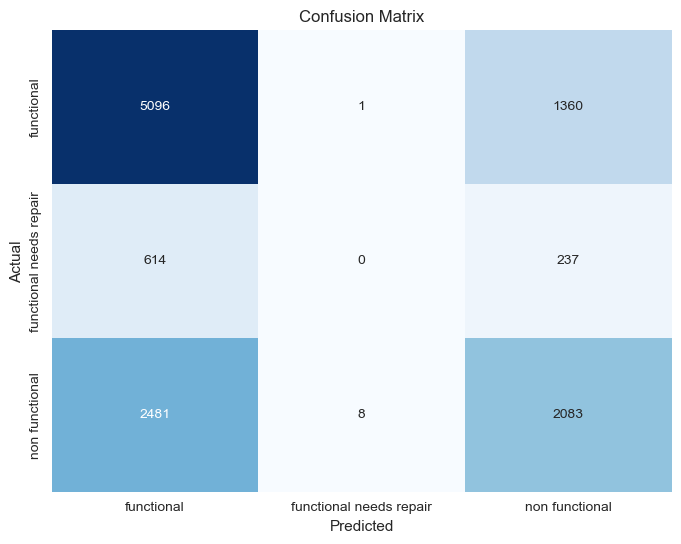

Classification Report:
                         precision    recall  f1-score   support

             functional       0.62      0.79      0.70      6457
functional needs repair       0.00      0.00      0.00       851
         non functional       0.57      0.46      0.50      4572

               accuracy                           0.60     11880
              macro avg       0.40      0.41      0.40     11880
           weighted avg       0.56      0.60      0.57     11880



In [74]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique target labels
labels = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Create a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [75]:
#This report shows the precision, recall, and F1-score for each class,.and provides the accuracy of the model overall.
# the model achieved an accuracy of 0.60,with varying performance across the different classes.

In [76]:
#The model's performance is below average. It performs relatively well in predicting the "functional" class,
#but poorly in identifying instances that need repair ("functional needs repair" class). Overall,
#the model has difficulty recognizing instances that require repair, indicating the need for improvement.
#that's why we use the next model.

In [77]:
# Create a KNN classifier
model_knn = KNeighborsClassifier()

# Train the model
model_knn.fit(X_train, y_train)

# Make predictions on the test data
y_predt = model_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predt)
print("Accuracy (KNN):", accuracy)


Accuracy (KNN): 0.6965488215488216


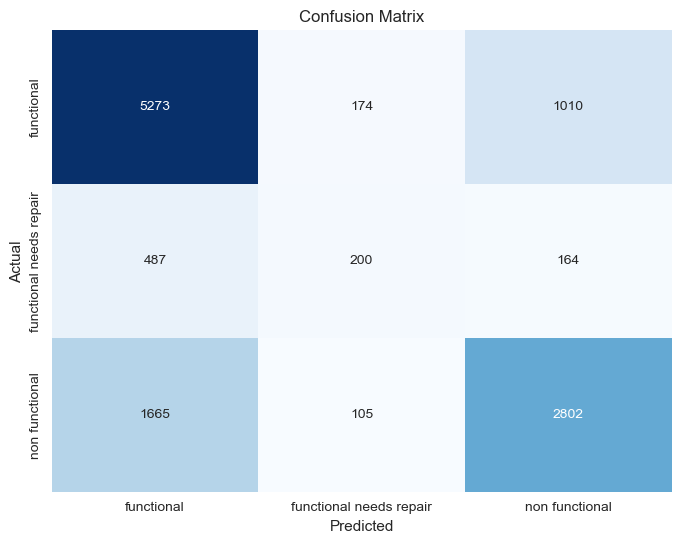

Classification Report:
                         precision    recall  f1-score   support

             functional       0.71      0.82      0.76      6457
functional needs repair       0.42      0.24      0.30       851
         non functional       0.70      0.61      0.66      4572

               accuracy                           0.70     11880
              macro avg       0.61      0.55      0.57     11880
           weighted avg       0.69      0.70      0.69     11880



In [78]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_predt)

# Get unique target labels
labels = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Create a classification report
class_report = classification_report(y_test, y_predt)
print("Classification Report:")
print(class_report)

In [79]:
#The KNN classifier achieved an accuracy of 0.70 when making predictions on the test data. 
#The precision, recall, and F1-score for each class are provided in the classification report. 
#The "support" column represents the number of samples in each class.
#In summary, the model's overall performance is decent, with better performance for the
#"functional" and "non functional" classes compared to the "functional needs repair" class. 
#However, there is room for improvement, particularly in correctly identifying instances requiring repair.

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_score = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

result_report = classification_report(y_true=y_test, y_pred=y_pred)
print(result_report)

Accuracy: 0.7929292929292929
Precision: 0.7929292929292929
Recall: 0.7929292929292929
F1-score: 0.7929292929292929
                         precision    recall  f1-score   support

             functional       0.81      0.86      0.83      6457
functional needs repair       0.50      0.35      0.41       851
         non functional       0.81      0.78      0.80      4572

               accuracy                           0.79     11880
              macro avg       0.70      0.66      0.68     11880
           weighted avg       0.79      0.79      0.79     11880



In [81]:
from sklearn.ensemble import RandomForestClassifier
# Assuming X_train and y_train are the training data
# Assuming X_test is the test data
# Assuming rf_model is the trained Random Forest model
# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# Predict churn labels for the test data
y_pred_rf = rf_model.predict(X_test)

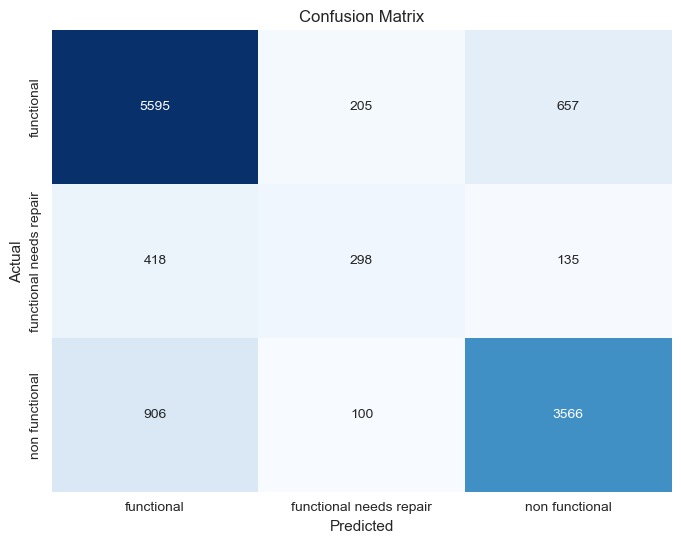

Classification Report:
                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84      6457
functional needs repair       0.49      0.35      0.41       851
         non functional       0.82      0.78      0.80      4572

               accuracy                           0.80     11880
              macro avg       0.71      0.67      0.68     11880
           weighted avg       0.79      0.80      0.79     11880



In [82]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Get unique target labels
labels = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Create a classification report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report)

In [83]:
X_test

<11880x4115 sparse matrix of type '<class 'numpy.float64'>'
	with 159160 stored elements in Compressed Sparse Row format>

# EVALUATION

- Based on the Classification Report, the final selected model has an overall accuracy of 0.80, which means that it correctly predicts the target variable 80% of the time.
-  precision metric measures the proportion of correctly predicted positive observations (true positives) out of all predicted positive observations. The recall metric measures the proportion of correctly predicted positive observations out of all actual positive observations. The f1-score is the harmonic mean of precision and recall.
- The results show that the model performs well in predicting the functional and non functional classes with f1-scores of 0.84 and 0.80, respectively. However, the model performs poorly in predicting the functional needs repair class with an f1-score of 0.41. This indicates that the model has difficulty distinguishing between functional needs repair and non functional classes.
- Overall, the weighted avg metric shows that the model has a precision of 0.79 and a recall of 0.80, which means that the model has a good balance between precision and recall across all classes.
- In summary, the final selected model appears to perform well in predicting two out of the three target classes, but may require further improvement in predicting the functional needs repair class.